In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import ast

In [ ]:
accounts_school  = pd.read_csv('./dumps/processed_csv/processed_accounts_school.csv')
accounts_user_contacts  = pd.read_csv('./dumps/processed_csv/processed_accounts_user_contacts.csv')
accounts_user = pd.read_csv('./dumps/processed_csv/processed_accounts_user.csv')
accounts_userquestionrecord = pd.read_csv('./dumps/processed_csv/processed_userquestionrecord.csv')
polls_questionset = pd.read_csv('./dumps/processed_csv/processed_polls_questionset.csv')
accounts_paymenthistory = pd.read_csv('./dumps/processed_csv/processed_accounts_paymenthistory.csv')

accounts_failpaymenthistory = pd.read_csv('./dumps/processed_csv/processed_accounts_failpaymenthistory.csv')
hackle_merge = pd.read_csv('./dumps/processed_csv/processed_hackle_merge.csv')

accounts_group = pd.read_csv('./dumps/votes_csv/accounts_group.csv')
accounts_attendance = pd.read_csv('./dumps/votes_csv/accounts_attendance.csv')

# 추가 전처리

In [3]:
hackle_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271638 entries, 0 to 10271637
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   user_id         float64
 2   language        object 
 3   osname          object 
 4   osversion       object 
 5   versionname     object 
 6   device_id       object 
 7   event_id        object 
 8   event_datetime  object 
 9   event_key       object 
 10  item_name       object 
 11  page_name       object 
 12  friend_count    float64
 13  votes_count     float64
 14  heart_balance   float64
 15  question_id     float64
dtypes: float64(5), object(11)
memory usage: 1.2+ GB


In [ ]:
accounts_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677080 entries, 0 to 677079
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             677080 non-null  int64  
 1   gender              677080 non-null  object 
 2   point               677080 non-null  int64  
 3   friend_id_list      674210 non-null  object 
 4   is_push_on          677080 non-null  int64  
 5   created_at          677080 non-null  object 
 6   block_user_id_list  677080 non-null  object 
 7   hide_user_id_list   677080 non-null  object 
 8   ban_status          677080 non-null  object 
 9   report_count        677080 non-null  int64  
 10  alarm_count         677080 non-null  int64  
 11  pending_chat        677080 non-null  int64  
 12  pending_votes       677080 non-null  int64  
 13  group_id            677080 non-null  float64
 14  friend_count        677080 non-null  int64  
dtypes: float64(1), int64(8), object(6)

In [8]:
accounts_paymenthistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     95140 non-null  int64 
 1   productId   95140 non-null  object
 2   phone_type  95140 non-null  object
 3   created_at  95140 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
accounts_failpaymenthistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          160 non-null    int64 
 1   user_id     160 non-null    int64 
 2   productId   56 non-null     object
 3   phone_type  160 non-null    object
 4   created_at  160 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.4+ KB


In [33]:
accounts_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5951 non-null   int64 
 1   address           5951 non-null   object
 2   student_count     5951 non-null   int64 
 3   school_type       5951 non-null   object
 4   address_clean     5948 non-null   object
 5   is_active_school  5951 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 238.4+ KB


In [34]:
accounts_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   user_id              5063 non-null   int64 
 2   contacts_count       5063 non-null   int64 
 3   invite_user_id_list  1158 non-null   object
 4   invite_cnt           5063 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 197.9+ KB


In [35]:
polls_questionset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157705 entries, 0 to 157704
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      157705 non-null  int64 
 1   question_piece_id_list  157705 non-null  object
 2   opening_time            157705 non-null  object
 3   status                  157705 non-null  object
 4   created_at              157705 non-null  object
 5   user_id                 157705 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.2+ MB


In [131]:
accounts_userquestionrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   question_id        1217558 non-null  int64 
 1   status             1217558 non-null  object
 2   created_at         1217558 non-null  object
 3   chosen_user_id     1217558 non-null  int64 
 4   question_id.1      1217558 non-null  int64 
 5   user_id            1217558 non-null  int64 
 6   question_piece_id  1217558 non-null  int64 
 7   has_read           1217558 non-null  int64 
 8   answer_status      1217558 non-null  object
 9   answer_updated_at  1217558 non-null  object
 10  report_count       1217558 non-null  int64 
 11  opened_times       1217558 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 111.5+ MB


In [41]:
accounts_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB


In [ ]:
# user_id 개별 처리 (str로 바꿔줌)

# hackle_merge는 user_id에 null값이 포함되어 있어서 pandas 전용 int 형변환 Int64로 해줌
hackle_merge['user_id'] = hackle_merge['user_id'].astype('Int64').astype(str)
hackle_merge['user_id'] = hackle_merge['user_id'].replace('<NA>', np.nan)

accounts_user['user_id'] = accounts_user['user_id'].astype(str)
accounts_paymenthistory['user_id'] = accounts_paymenthistory['user_id'].astype(str)
accounts_failpaymenthistory['user_id'] = accounts_failpaymenthistory['user_id'].astype(str)
accounts_user_contacts['user_id'] = accounts_user_contacts['user_id'].astype(str)
polls_questionset['user_id'] = polls_questionset['user_id'].astype(str)
accounts_userquestionrecord['user_id'] = accounts_userquestionrecord['user_id'].astype(str)
accounts_userquestionrecord['chosen_user_id'] = accounts_userquestionrecord['chosen_user_id'].astype(str)
accounts_attendance['user_id'] = accounts_attendance['user_id'].astype(str)

In [5]:
# 잘 처리됐는지 확인
hackle_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271638 entries, 0 to 10271637
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   user_id         object 
 2   language        object 
 3   osname          object 
 4   osversion       object 
 5   versionname     object 
 6   device_id       object 
 7   event_id        object 
 8   event_datetime  object 
 9   event_key       object 
 10  item_name       object 
 11  page_name       object 
 12  friend_count    float64
 13  votes_count     float64
 14  heart_balance   float64
 15  question_id     float64
dtypes: float64(4), object(12)
memory usage: 1.2+ GB


In [ ]:
# id 컬럼명 변경
accounts_school.rename(columns={'id': 'school_id'}, inplace=True)
accounts_group.rename(columns={'id': 'group_id'}, inplace=True)

# 컬럼 데이터 타입 변환
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(ast.literal_eval)

# 리스트 펼쳐진 새로운 df 생성
new_attendance = accounts_attendance.explode('attendance_date_list')

# user_contacts의 id drop
accounts_user_contacts.drop(columns='id', inplace=True)
new_attendance.drop(columns='id', inplace=True)

In [35]:
# datetime 변환
accounts_user['created_at'] = pd.to_datetime(accounts_user['created_at']).dt.floor('s')
polls_questionset['created_at'] = pd.to_datetime(polls_questionset['created_at']).dt.floor('s')
accounts_paymenthistory['created_at'] = pd.to_datetime(accounts_paymenthistory['created_at']).dt.floor('s')

new_attendance['attendance_date_list'] = pd.to_datetime(new_attendance['attendance_date_list']).dt.floor('s')

# 하트 수, 친구 수 이상치 기준 확인해보기

## hackle 유저의 하트 수 이상치 기준 확인

In [11]:
hackle_merge.head(3)

,session_id,user_id,language,osname,osversion,versionname,device_id,event_id,event_datetime,event_key,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,NaN,NaN,64.0,436.0,4830.0,NaN
1,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0294d883-0e06-415c-b970-5e8ee2517b60,2023-07-18 21:01:38,$session_start,NaN,NaN,NaN,NaN,NaN,NaN
2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0acb0eb0-3bc9-48b9-a166-080888572fc6,2023-07-18 21:17:44,view_lab_tap,NaN,NaN,64.0,436.0,4830.0,NaN


In [10]:
# hackle에 찍힌 유저들만 추출
hackle_users = hackle_merge['user_id'].unique()

# 날짜 범위 확인
hackle_merge['event_datetime'].min(), hackle_merge['event_datetime'].max()

('2023-07-18 00:00:00', '2023-08-10 23:59:59')

In [11]:
# hackle 유저로 필터링
user_hackle = accounts_user[accounts_user['user_id'].isin(hackle_users)]
payment_hackle = accounts_paymenthistory[accounts_paymenthistory['user_id'].isin(hackle_users)]
failpayment_hackle = accounts_failpaymenthistory[accounts_failpaymenthistory['user_id'].isin(hackle_users)]

# 실패 기록의 id 제거
failpayment_hackle.drop(columns='id', inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26632\3590997011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failpayment_hackle.drop(columns='id', inplace=True)


In [12]:
# 근데 어떤 유저들은 해클 기간 훨씬 이전에 가입해서
# 해클 기간까지 구매를 해서 하트가 쌓였을 수도 있지 않나?

# 기간으로도 필터링하기에는 안 맞지 않나..?
# 그럼 날짜 max로만 자르자!
payment_date_cond = payment_hackle['created_at'] <= hackle_merge['event_datetime'].max()
failpayment_date_cond = failpayment_hackle['created_at'] <= hackle_merge['event_datetime'].max()

# 해클 max 기간 이전 구매 기록들
payment_hackle = payment_hackle[payment_date_cond]
failpayment_hackle = failpayment_hackle[failpayment_date_cond]

In [50]:
# 잘 잘렸나 확인
origin_payment_date = accounts_paymenthistory['created_at'].max()
edited_payment_date = payment_hackle['created_at'].max()

print(f'오리지널 paymenthistory: {origin_payment_date}\
      \n날짜 변경 paymenthistory: {edited_payment_date}')

오리지널 paymenthistory: 2024-05-08 23:12:45      
날짜 변경 paymenthistory: 2023-08-10 21:33:52


In [ ]:
# 상품명에 적힌 하트 수 컬럼명 생성
# 취소기록은 아직 합치지 않은 상태에서 총 구매 하트를 확인해보려고 함
buy_hearts_hackle = payment_hackle.copy()
buy_hearts_hackle['hearts'] = buy_hearts_hackle['productId'].apply(lambda x: int(x.split('.')[-1]))

# 구매 기록의 총 하트 수 (취소 기록 제외 X)
buy_hearts_hackle.groupby('user_id')['hearts'].sum().reset_index(name='total_hearts').sort_values(by='total_hearts', ascending=False)

,user_id,total_hearts
4758,1141603,75977
5790,1167602,56777
8149,1216899,49977
3654,1111139,44777
2579,1081092,38977
...,...,...
3873,1117928,200
3622,1110744,200
2989,1093082,200
2655,1083594,200


### productId null 분석

In [36]:
notnull_fail = len(failpayment_hackle[failpayment_hackle['productId'].notnull()])
null_fail = len(failpayment_hackle[failpayment_hackle['productId'].isnull()])

print(f'null이 아닌 실패기록: {notnull_fail}\
      \nnull 실패기록: {null_fail}')


null이 아닌 실패기록: 22      
null 실패기록: 63


In [10]:
payment = payment_hackle.copy()
failpayment = failpayment_hackle.copy()
failpayment

# 합쳤을 때 구분을 위해 표시해줌
payment['is_success'] = 's'
failpayment['is_success'] = 'f'

# 모든 기록을 합침
total_history = pd.concat([payment, failpayment])
total_history = total_history.sort_values(by=['user_id', 'created_at']).reset_index()
total_history

,index,user_id,productId,phone_type,created_at,is_success
0,37513,1000061,heart.777,I,2023-05-19 20:11:06,s
1,89139,1000061,heart.1000,I,2023-06-17 11:42:18,s
2,89140,1000061,heart.1000,I,2023-06-17 11:43:19,s
3,67127,1000083,heart.777,I,2023-05-26 20:05:06,s
4,6322,1000145,heart.777,I,2023-05-14 17:42:04,s
...,...,...,...,...,...,...
44749,7659,999927,heart.1000,I,2023-05-14 19:36:54,s
44750,14838,999927,heart.1000,I,2023-05-15 17:15:33,s
44751,25976,999927,heart.1000,I,2023-05-16 23:48:47,s
44752,70917,999942,heart.777,I,2023-05-27 20:22:59,s


In [11]:
# 구매 실패 기록 index 확인용
total_history[total_history['is_success']=='f']

,index,user_id,productId,phone_type,created_at,is_success
408,17,1008906,NaN,I,2023-05-25 16:06:32,f
852,19,1016936,NaN,I,2023-05-18 22:55:31,f
1898,21,1039257,heart.777,A,2023-05-14 23:17:32,f
2787,22,1055891,heart.200,A,2023-05-14 14:49:22,f
2818,23,1056623,heart.777,A,2023-05-20 03:36:57,f
...,...,...,...,...,...,...
41315,4,894196,NaN,I,2023-06-05 00:01:04,f
41397,5,897014,NaN,I,2023-06-25 20:37:53,f
41988,6,917396,NaN,I,2023-06-03 20:21:33,f
42039,7,918859,NaN,I,2023-05-16 21:19:53,f


In [ ]:
# 구매하고 바로 실패한듯
# 구매부터 실패까지 2초밖에 안걸림
# 근데 왜 productId가 null이 떴지?

total_history.iloc[408 - 1: 408 + 1]

,index,user_id,productId,phone_type,created_at,is_success
407,62635,1008906,heart.200,I,2023-05-25 16:06:30,s
408,17,1008906,NaN,I,2023-05-25 16:06:32,f


In [12]:
# productId가 null이 안 뜬 기록들은 이전 기록 행이 없음
# 구매기록과 합쳐진건가?
total_history.iloc[2818 - 1: 2818 + 1]

,index,user_id,productId,phone_type,created_at,is_success
2817,91058,1056534,heart.1000,A,2023-07-20 20:27:42,s
2818,23,1056623,heart.777,A,2023-05-20 03:36:57,f


In [ ]:
cond = (total_history['productId'].notnull()) & (total_history['is_success'] == 'f')
not_null_idx = total_history[cond].index

total_df = pd.DataFrame({})
is_diff = []
for i in range(len(total_history)):
    if i in not_null_idx:
        df = total_history.iloc[i - 1: i + 1] 
        total_df = pd.concat([total_df, df]) # 실패기록의 이전행, 현재행 저장
        if df['user_id'].iloc[1] == df['user_id'].iloc[0]: # 이전행, 현재행의 user_id가 같다면
            is_diff.append(i) # 어느 위치인지 알려주기

# 실패 기록 이전, 현재의 user_id가 같은 친구들
# 총 실패기록 22개 중 2개 (약 9.1%)
is_diff

[2787, 20524]

In [31]:
# user_id가 같지만 
# 이전 구매 기록과 현재의 실패 기록의 productId가 서로 다름
# productId가 있는 애들은 구매&실패 기록이 잘 합쳐진 애들인 듯

i = 2787
total_history.iloc[i - 1: i + 1]

,index,user_id,productId,phone_type,created_at,is_success
2786,3950,1055891,heart.777,A,2023-05-14 14:48:05,s
2787,22,1055891,heart.200,A,2023-05-14 14:49:22,f


In [32]:
i = 20524
total_history.iloc[i - 1: i + 1]

,index,user_id,productId,phone_type,created_at,is_success
20523,23819,1297332,heart.777,A,2023-05-16 20:51:13,s
20524,90,1297332,heart.200,A,2023-05-26 22:23:59,f


In [ ]:
# null이 아닌 실패기록 모음
# 이전행과 해당행을 모아둠
total_df.head(10)

,index,user_id,productId,phone_type,created_at,is_success
1897,19131,1039177,heart.200,I,2023-05-16 00:37:35,s
1898,21,1039257,heart.777,A,2023-05-14 23:17:32,f
2786,3950,1055891,heart.777,A,2023-05-14 14:48:05,s
2787,22,1055891,heart.200,A,2023-05-14 14:49:22,f
2817,91058,1056534,heart.1000,A,2023-07-20 20:27:42,s
2818,23,1056623,heart.777,A,2023-05-20 03:36:57,f
3038,6750,1060892,heart.777,I,2023-05-14 18:14:47,s
3039,24,1060915,heart.777,A,2023-05-15 13:45:10,f
3959,87364,1078172,heart.200,I,2023-06-07 18:45:31,s
3960,26,1078215,heart.777,A,2023-05-18 21:56:57,f


In [ ]:
# null이 아닌 애들이 구매기록과 실패기록이 합쳐진 거라면
# null이 뜬 애들은 이전 구매기록과 같아야겠지?
# 이전 행, 현재 행의 user_id가 서로 같은지 확인해보자

cond = (total_history['productId'].isnull()) & (total_history['is_success'] == 'f')
null_idx = total_history[cond].index

total_df = pd.DataFrame({})
is_diff = []
for i in range(len(total_history)):
    if i in null_idx:
        df = total_history.iloc[i - 1: i + 1] 
        if df['user_id'].iloc[1] != df['user_id'].iloc[0]: # 이전행, 현재행의 user_id가 다르다면
            is_diff.append(i) # 어느 위치인지 알려주기

# 실패 기록 이전, 현재의 user_id가 다른 친구들
# 총 실패기록 63개 중 2개 (약 3.2%)
is_diff

[22537, 31579]

In [ ]:
# 얘네는 이전 행에 같은 유저의 구매 기록이 아예 없네
i = 22537
total_history.iloc[i - 1: i + 1]

,index,user_id,productId,phone_type,created_at,is_success
22536,45457,1322638,heart.777,A,2023-05-21 14:03:42,s
22537,98,1322662,NaN,I,2023-05-19 22:38:32,f


In [34]:
i = 31579
total_history.iloc[i - 1: i + 1]

,index,user_id,productId,phone_type,created_at,is_success
31578,86761,1445384,heart.777,I,2023-06-06 14:29:09,s
31579,129,1445414,NaN,I,2023-05-23 18:20:26,f


[일단 정리]
- 실패 기록 중 
- productId가 null이면, 이전 구매기록과 합쳐지지 않은 것으로 추정
    - 왜나면 해당 실패기록이 이전 구매기록과 같은 유저였음 (예외 기록이 약 3%)
- null이 아니면, 이전 구매기록과 합쳐진 것으로 추정
    - 왜나면 해당 실패기록이 이전 구매기록과 다른 유저였음 (예외 기록이 약 9%)
- 위의 예외 기록들은 어차피 이전 구매기록들이 없으니, 일단 제외하고 진행함 (총 4개)

In [65]:
# 구매부터 실패까지 평균 시간을 구해보자
# productId가 null이더라도
# 구매~실패 기록 차이가 최대 하루를 못 넘기면
# null값은 바로 이전 구매 기록의 productId이 조금 확실해지겠지

# 예외기록들은 제외
drop_idx = [2787, 20524, 22537, 31579]
new_total_history = total_history.drop(index=drop_idx)

# product_id가 null이 아닌 실패기록들도 제외
# 구매기록과 합쳐진 애들로 보기 때문
cond = (new_total_history['productId'].notnull()) & (new_total_history['is_success'] == 'f')
new_total_history = new_total_history[~cond]
new_total_history.reset_index(inplace=True)

new_total_history['created_at'] = pd.to_datetime(new_total_history['created_at']).dt.floor('s')

times = []
remove_history_idx = []

# null 친구들만 시간 차이를 계산함
# null 아닌 기록들은 이전 구매 기록의 user_id와 다르기 때문
for i in range(len(new_total_history)):
    if new_total_history.iloc[i]['is_success'] == 'f':
        if new_total_history.iloc[i]['user_id'] == new_total_history.iloc[i-1]['user_id']: # 실패 기록 이전 행이랑 user_id가 같다면
            time_diff = new_total_history.iloc[i]['created_at'] - new_total_history.iloc[i-1]['created_at']
            times.append(time_diff)
            remove_history_idx.append(i)    # 삭제할 이전행, 현재행 index 저장
            remove_history_idx.append(i-1)

# 이전행과 user_id가 같았던 실패기록들 (null 친구들)은 
# 총 63 - 2개(위의 예외기록 중 2개만 null이었음)로 61개였음
# times 개수와 잘 맞음
len(times) 

61

In [66]:
# 구매부터 취소까지 걸리는 평균
# 대략 24분 정도 걸림
np.mean(times)

Timedelta('0 days 00:23:58.754098360')

[정리]
- 예외 기록 4개를 제외하고 구매~취소 기간 차이를 계산한 결과, 약 24분으로 나옴
- 30분도 되지 않는 시간 내에 
- 같은 유저가 구매, 취소 기록을 동시에 갖고 있으므로
- <mark>null은 그저 구매 + 취소 기록이 합쳐지지 않은 것으로 추정할 수 있음      
---
‼️이 부분은 ai의 힘을 빌림, 그래서 그냥 그랬을 수도 있겠구나~ 하고 보면 될 듯   
[그럼 왜 기록이 안 합쳐졌을까]
- 로그 처리 순서나 트랜잭션 동기화 문제로 인해 구매-취소 로그가 매칭되지 못했을 가능성
- 이벤트 전달 타이밍 차이로 인해 일시적으로 productId가 비어 저장됐을 가능성
- 취소나 실패가 특정 조건에서 별도 로그로 남고, 그 과정에서 product 정보가 누락되도록 설계됐을 가능성

In [ ]:
# 구매-실패 행 제거한 최종 merge 버전
final_total_history = new_total_history.copy()
final_total_history.drop(index=remove_history_idx, inplace=True)
final_total_history.reset_index(drop=True, inplace=True)

# 실패 기록이 잘 사라진 걸 볼 수 있음
final_total_history[final_total_history['is_success'] == 'f']

,level_0,index,user_id,productId,phone_type,created_at,is_success


In [ ]:
# 상품명에 적힌 하트 수 컬럼명 생성
final_total_history['hearts'] = final_total_history['productId'].apply(lambda x: int(x.split('.')[-1]))

# 구매 기록의 총 하트 수 (취소 기록 제외)
# 취소기록 이전과 비교했을 때 상위권 변화가 없음
final_total_history.groupby('user_id')['hearts'].sum().reset_index(name='total_hearts').sort_values(by='total_hearts', ascending=False)

,user_id,total_hearts
4757,1141603,75977
5788,1167602,56777
8144,1216899,49977
3653,1111139,44777
2578,1081092,38977
...,...,...
7554,1205200,200
9566,1242808,200
9568,1242844,200
9050,1233129,200


### 최대 구매 하트수 이상 보유 중인 유저 분석 

In [77]:
# 그럼 최대 75,977개 이상의 하트를 가지고 있는 사람은 이상치인가?
# 몇 명 정도 존재하는 지 확인해야겠음 -> 13명 존재

over_hearts = hackle_merge['heart_balance'] > 75977
hackle_merge[over_hearts]['user_id'].nunique()

13

In [ ]:
# 이상치 유저 추출
outlier_user = hackle_merge[over_hearts]['user_id'].unique()

# 유저 정보 확인
# 분명 75,977개를 뛰어넘는 유저들의 정보를 가져왔는데
# 포인트가 1680, 8933개 등과 같이 매우 낮은 유저들 확인
# 유저 테이블은 2024년까지 업데이트 되어서인가? -> 그렇다기엔 만들어진 날짜가 2023년도임 -> 업데이트 날짜가 아니라 회원가입 날짜인가?
# 아니면 포인트와 하트는 아예 다른 게 확실한가?
accounts_user[accounts_user['user_id'].isin(outlier_user)]

In [82]:
# 75,977보다 낮은 포인트를 가지고 있는 유저들 hackle 확인
outlier_user_info = accounts_user[accounts_user['user_id'].isin(outlier_user)]
under_outlier_info = outlier_user_info[outlier_user_info['point'] < 75977]
under_outlier_info

,user_id,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count
113137,967442,F,8933,"[902144, 1284225, 936196, 1012359, 898445, 907...",1,2023-05-07 21:56:51,[],[],N,0,0,0,0,10396.0,27
407467,1287325,M,57667,"[1563520, 1183746, 1288196, 1290502, 1575689, ...",1,2023-05-15 19:33:08,[],[],N,0,1,0,38,51364.0,70
537731,1431519,M,62272,"[1563520, 1183746, 1288196, 1290502, 1575689, ...",1,2023-05-21 22:27:30,[],[],N,0,1,0,134,70743.0,47
671665,1577930,M,1680,"[838785, 982531, 882567, 879496, 838541, 83649...",1,2023-07-09 04:39:15,[],[],N,0,2,0,31,1.0,46


In [83]:
under_outlier_user = under_outlier_info['user_id'].unique()
under_outlier_hackle = hackle_merge[hackle_merge['user_id'].isin(under_outlier_user)].sort_values(by=['user_id', 'event_datetime'])
under_outlier_hackle

,session_id,user_id,language,osname,osversion,versionname,device_id,event_id,event_datetime,event_key,item_name,page_name,friend_count,votes_count,heart_balance,question_id
6022766,4LxbU2CW2ZfGL6jQYT1K9yRpVTG3,1287325,ko-KR,iOS,16.6,2.0.5,BB3D3B32-EAD1-40F6-A2A8-BB5A98FAB9E0,06aae2b1-afa1-4798-a7ed-756374e737fe,2023-07-19 00:06:01,$session_start,NaN,NaN,69.0,342.0,88877.0,NaN
6022863,4LxbU2CW2ZfGL6jQYT1K9yRpVTG3,1287325,ko-KR,iOS,16.6,2.0.5,BB3D3B32-EAD1-40F6-A2A8-BB5A98FAB9E0,8aada421-b178-4ab5-a2f6-b724ed3f6b94,2023-07-19 00:06:01,launch_app,NaN,NaN,69.0,342.0,88877.0,NaN
12627712,4LxbU2CW2ZfGL6jQYT1K9yRpVTG3,1287325,ko-KR,iOS,16.5,2.0.3,BB3D3B32-EAD1-40F6-A2A8-BB5A98FAB9E0,06aae2b1-afa1-4798-a7ed-756374e737fe,2023-07-19 00:06:01,$session_start,NaN,NaN,69.0,342.0,88877.0,NaN
12627809,4LxbU2CW2ZfGL6jQYT1K9yRpVTG3,1287325,ko-KR,iOS,16.5,2.0.3,BB3D3B32-EAD1-40F6-A2A8-BB5A98FAB9E0,8aada421-b178-4ab5-a2f6-b724ed3f6b94,2023-07-19 00:06:01,launch_app,NaN,NaN,69.0,342.0,88877.0,NaN
12797541,4LxbU2CW2ZfGL6jQYT1K9yRpVTG3,1287325,ko-KR,iOS,16.5,2.0.5,BB3D3B32-EAD1-40F6-A2A8-BB5A98FAB9E0,06aae2b1-afa1-4798-a7ed-756374e737fe,2023-07-19 00:06:01,$session_start,NaN,NaN,69.0,342.0,88877.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15306284,Y7rvLcfCMBWCGlGqguDr59rNQoL2,967442,ko,Android,13,2.0.5,61001a1f-7b8b-4fce-94be-6f3c626b38fe,15633acb-baa4-4d4b-9e87-5c5cb2502bcf,2023-08-05 18:29:17,view_timeline_tap,NaN,NaN,28.0,161.0,8517.0,NaN
15306286,Y7rvLcfCMBWCGlGqguDr59rNQoL2,967442,ko,Android,13,2.0.5,61001a1f-7b8b-4fce-94be-6f3c626b38fe,31eb647a-0038-42e9-b865-a4caa114eeb9,2023-08-05 18:29:17,click_bottom_navigation_questions,NaN,NaN,28.0,161.0,8517.0,NaN
15306287,Y7rvLcfCMBWCGlGqguDr59rNQoL2,967442,ko,Android,13,2.0.5,61001a1f-7b8b-4fce-94be-6f3c626b38fe,50930719-5d43-4646-b2f2-60a1ab137464,2023-08-05 18:29:17,view_lab_tap,NaN,NaN,28.0,161.0,8517.0,NaN
15306296,Y7rvLcfCMBWCGlGqguDr59rNQoL2,967442,ko,Android,13,2.0.5,61001a1f-7b8b-4fce-94be-6f3c626b38fe,e8abeda3-7814-41a4-9e97-3b0bb2bb4c43,2023-08-05 18:29:17,view_questions_tap,NaN,NaN,28.0,161.0,8517.0,NaN


In [ ]:
# 아니 이 유저는
# 처음 로그인할 때는 8천대였다가
# 갑자기 하트가 7억개로 갑자기 뛰네
# 그러다 세션 id가 바뀌면서 다시 8천대로 돌아옴
# 7/21 ~ 8/5까지 7억개로 지냈음

colums = ['session_id', 'user_id', 'device_id' ,'event_datetime', 'event_key', 'friend_count', 'votes_count', 'heart_balance']
under_outlier_hackle[under_outlier_hackle['user_id'] == '967442'][colums]

,session_id,user_id,device_id,event_datetime,event_key,friend_count,votes_count,heart_balance
13435204,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 01:53:30,$session_end,NaN,NaN,NaN
13435197,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:36,launch_app,NaN,NaN,NaN
13435201,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:36,$session_end,NaN,NaN,NaN
13435208,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:36,$session_start,NaN,NaN,NaN
13435195,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:37,$session_start,28.0,161.0,8517.0
13435187,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:56,click_bottom_navigation_profile,15.0,28.0,703126260.0
13435192,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:56,view_lab_tap,15.0,28.0,703126260.0
13435206,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:24:56,view_timeline_tap,15.0,28.0,703126260.0
13435202,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:25:01,click_appbar_setting,15.0,28.0,703126260.0
13435188,b653e4fe-f7a4-45ba-be46-7f01053b6c21,967442,b653e4fe-f7a4-45ba-be46-7f01053b6c21,2023-07-21 02:25:25,click_appbar_setting,15.0,28.0,703126260.0


## hackle 유저의 친구 수 이상치 기준 확인

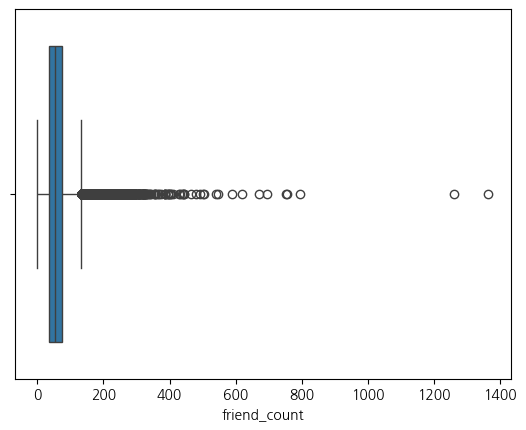

In [29]:
# 비회원 유저 제외해서 확인
not_null_hackle = hackle_merge[hackle_merge['user_id'].notnull()]

friend_max = not_null_hackle.groupby('user_id')['friend_count'].max().reset_index().sort_values(by='friend_count', ascending=False)

# 
sns.boxplot(data=friend_max, x='friend_count')
plt.show()

# 전체 퍼널 유저 수 확인

- 노출: accounts_school, accounts_user_contacts
- 유입: accounts_user
- 참여: polls_questionset
- 리텐션: Anylog,,,
- 수익: accounts_paymenthistory
---
- accounts_user, polls_questionset, accounts_paymenthistory
    - 기간: 2023-05-13 ~ 2024-05-07

---
[참고용]   
- 퍼널 단계 순서를 다르게 할 때마다 변수 구분을 위해
- 퍼널 순서를 영어화해서 앞에 붙여줬음
- 예시) 
    - abcde: 5단계를 뜻함 (노출 - 유입 - 참여 - 리텐션 - 수익)
    - bcd: 3단계를 뜻함 (유입 - 참여 - 리텐션)

In [133]:
# 날짜 조건 생성
funnel_user_cond = (accounts_user['created_at'] >= '2023-05-13') & (accounts_user['created_at'] <= '2024-05-07')
funnel_questionset_cond = (polls_questionset['created_at'] >= '2023-05-13') & (polls_questionset['created_at'] <= '2024-05-07')
funnel_paymenthistory_cond = (accounts_paymenthistory['created_at'] >= '2023-05-13') & (accounts_paymenthistory['created_at'] <= '2024-05-07')
funnel_question_cond = (accounts_userquestionrecord['created_at'] >= '2023-05-13') & (accounts_userquestionrecord['created_at'] <= '2024-05-07')
funnel_attendance_cond = (new_attendance['attendance_date_list'] >= '2023-05-13') & (new_attendance['attendance_date_list'] <= '2024-05-07')

# 날짜 필터링 - 퍼널 df 생성
funnel_user = accounts_user[funnel_user_cond]
funnel_questionset = polls_questionset[funnel_questionset_cond]
funnel_payment = accounts_paymenthistory[funnel_paymenthistory_cond]
funnel_question = accounts_userquestionrecord[funnel_question_cond]
funnel_attendance = new_attendance[funnel_attendance_cond]

## 노출 → 유입 → 참여 → 리텐션 → 수익

#### 노출

In [40]:
# 지역별 학교별 활성도에 따른 오프라인 노출
# is_active_school가 True인 학교의 학생들 수 파악
# 활성화된 학교의 유저들은 노출이 어느정도 있었을 테니까
# 활성화된 학교의 학생 수 전체를 노출로 봐도 되지 않을까

active_school = accounts_school[accounts_school['is_active_school'] == 1]
school_user = active_school['student_count'].sum()
school_user

np.int64(655303)

In [41]:
# invite_user_id_list가 1 이상이면 초대 받은 유저들
# 초대 받은 유저들도 초대로 노출이 된거니까 
# # 노출 수로 봐도 되지 않을까
invited_user = accounts_user_contacts[accounts_user_contacts['invite_cnt'] > 0]['user_id'].unique()
len(invited_user)

1158

In [42]:
# school_user와 invited_user 간에 겹칠텐데..?
# 근데 invited_user도 어차피 school_user 구할 때 이미 다 포함되지 않았나?
# 그럼 school_user만 구해도 되는 거 아닌가? -> 아 활성화 False인 유저는 school_user에 포함 안되어 있음
# invited_user 중 활성화 False인 학교를 다니는 사람만 더하면 될 듯!

# invited_user 중 학교 id가 이상치인 걸 찾아보자 (like. school_id = 1)
invited_user_info = accounts_user[accounts_user['user_id'].isin(invited_user)][['user_id', 'group_id']]
invited_user_info = pd.merge(invited_user_info, accounts_group, on='group_id', how='left')
invited_user_info = pd.merge(invited_user_info, accounts_school[['school_id', 'is_active_school']], on='school_id', how='left')

# merge 했을 때, 다행히 null은 없음
invited_user_info.isnull().sum()

user_id             0
group_id            0
grade               0
class_num           0
school_id           0
is_active_school    0
dtype: int64

In [ ]:
# 초대 받은 유저들 중
# 활성화 안 된 학교를 다니는 유저는 없었음
# 그럼 그냥 school user로만 노출 유저로 보면 될 듯!

invited_user_info[invited_user_info['is_active_school'] == 0]

,user_id,group_id,grade,class_num,school_id,is_active_school


In [ ]:
abcde_exposure_user = school_user
abcde_exposure_user

np.int64(655303)

#### 유입

In [ ]:
# 활성화된 학교 정보 추가
abcde_user = pd.merge(funnel_user, accounts_group, on='group_id', how='left')
abcde_user = pd.merge(abcde_user, accounts_school[['school_id', 'is_active_school']], on='school_id', how='left')

# 활성화된 학교를 다니는 유저만 추출
abcde_user = abcde_user[abcde_user['is_active_school'] == 1]
abcde_user.head(5)

,user_id,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count,grade,class_num,school_id,is_active_school
0,855179,M,1358,"[849767, 850569, 857770, 856249, 850108, 869470]",1,2023-05-19 01:36:23,[],[],N,0,1,0,23,5532.0,6,3,8,5220,True
1,866522,F,2429,"[863744, 880135, 857608, 865290, 860687, 86376...",1,2023-05-19 01:32:15,[],[],N,0,1,0,17,7389.0,96,1,2,5256,True
2,916697,M,441,"[890753, 921090, 936709, 1035016, 1081352, 972...",1,2023-05-19 01:11:30,[1165931],[],N,0,1,0,1,18094.0,52,1,6,1856,True
3,920278,F,991,"[1452418, 935043, 982406, 1106183, 948743, 935...",0,2023-05-19 01:09:58,[],[],N,0,1,0,1,16478.0,35,2,5,4609,True
4,921725,F,839,"[900514, 924484, 992548, 934887, 946027, 92718...",0,2023-05-19 01:09:18,[],[],N,0,1,0,0,683.0,21,2,4,5214,True


In [87]:
abcde_signup_user = abcde_user['user_id'].unique()
len(abcde_signup_user)

347976

#### 참여

- 질문 완료한 유저(질문 세트X, 한 세트(10개) 중에 하나 이상 기록이 있는 유저)

In [ ]:
# ------------------ question으로 보기로 내용 바뀜 ---------------------------------


# cond = (funnel_questionset['status'] == 'F') | (funnel_questionset['status'] == 'O')
# abcde_questionset = funnel_questionset[cond]
# abcde_questionset = abcde_questionset[abcde_questionset['user_id'].isin(abcde_signup_user)]
# abcde_questionset.head(5)

,id,question_piece_id_list,opening_time,status,created_at,user_id
55594,4252532,"[42525601, 42525602, 42525604, 42525607, 42525...",2023-05-13 00:01:28,F,2023-05-13 00:01:28,1189890
55605,4254131,"[42541598, 42541599, 42541600, 42541602, 42541...",2023-05-13 00:44:24,F,2023-05-13 00:04:25,1189890
55622,4256194,"[42562228, 42562229, 42562230, 42562231, 42562...",2023-05-13 00:47:57,F,2023-05-13 00:07:57,1185796
55626,4256412,"[42564400, 42564402, 42564404, 42564406, 42564...",2023-05-13 00:08:21,F,2023-05-13 00:08:21,1190023
55632,4257183,"[42572110, 42572113, 42572115, 42572118, 42572...",2023-05-13 00:43:31,F,2023-05-13 00:09:48,1186756


In [ ]:
# ------------------ question으로 보기로 내용 바뀜 ---------------------------------



# # 1,886명밖에 안 나옴
# # 질문 세트중 하나라도 완료한 걸 보려면 질문 테이블로 봐야하지 않나?
# # 일단 질문 세트로도 다시 봐야겠음

# abcde_questionset_user = abcde_questionset['user_id'].unique()
# len(abcde_questionset_user)

1886

In [147]:
# 와,,, 질문으로만 보면
# 수가 더 적어지네..?
# 하긴 그럴만도 한게 질문 테이블의 전체 유저 수는 4천여명밖에 안됐음
# 일단 질문 세트 테이블로 가는 것으로!

abcde_question = funnel_question[funnel_question['user_id'].isin(abcde_signup_user)]
abcde_question_passive_user = abcde_question['chosen_user_id'].unique()
abcde_question_active_user = abcde_question['user_id'].unique()


print(f'능동적 유저: {len(abcde_question_active_user)}\
      \n수동적 유저: {len(abcde_question_passive_user)}')

능동적 유저: 1828      
수동적 유저: 6913


In [135]:
abcde_question_total_user = np.append(abcde_question_passive_user, abcde_question_active_user)
print(f'오리지널: {len(abcde_question_total_user)}')

abcde_question_total_user = np.unique(abcde_question_total_user)
print(f'중복제거: {len(abcde_question_total_user)}')

오리지널: 8741
중복제거: 6972


#### 리텐션

- any log,,,
- 참여 시기 다음날부터 또 접속을 했는가

In [124]:
# ------------------ question으로 보기로 내용 바뀜 ---------------------------------


# # 질문 열어서 만든 첫 시기를 가져옴
# funnel_questionset.sort_values(by=['user_id', 'created_at'], inplace=True)
# first_questionset = funnel_questionset.drop_duplicates(subset='user_id', keep='first')
# first_questionset = first_questionset[['user_id', 'created_at']]

# # 어차피 접속을 하면 남는 게 출석 테이블이겠지..?
# # 출석 테이블로 확인해보자
# # 일단 참여 유저만 남겨둠
# abcde_attendance = funnel_attendance[funnel_attendance['user_id'].isin(abcde_questionset_user)]

# # 참여 다음날을 비교하기 위해 합쳐줌
# abcde_attendance_merge = pd.merge(abcde_attendance, first_questionset, on='user_id', how='left')
# abcde_attendance_merge.isnull().sum() # 합치면서 결측치 없었음

# # 첫 질문 세트 기록 이후 접속했는가?
# abcde_attendance_merge['is_retention'] = abcde_attendance_merge['created_at'] < abcde_attendance_merge['attendance_date_list']
# abcde_attendance_merge = abcde_attendance_merge[abcde_attendance_merge['is_retention'] == 1]

# abcde_attendance_user = abcde_attendance_merge['user_id'].unique()
# len(abcde_attendance_user)

In [ ]:
abcde_question.sort_values(by='created_at', inplace=True)

# 질문 열어서 만든 첫 시기를 가져옴
# 근데 수동 유저, 능동 유저의 첫 시기들이 겹쳐져 있으므로,
# 수동 유저 첫 시기만 따로 구하고,
# 능동 유저의 첫 시기만 따로 구해서 합쳐야 할듯

first_question_choose = abcde_question.drop_duplicates(subset='user_id', keep='first') # 능동 유저
first_question_chosen = abcde_question.drop_duplicates(subset='chosen_user_id', keep='first') # 수동 유저

first_question_choose = first_question_choose[['user_id', 'created_at']]
first_question_chosen = first_question_chosen[['chosen_user_id', 'created_at']]
first_question_chosen.rename(columns={'chosen_user_id': 'user_id'}, inplace=True)

# 두 테이블 합침
first_question = pd.concat([first_question_choose, first_question_chosen])

# 능동 유저가 질문 선택됐을 수도 있으니
# 시간 제일 빠른 순으로 중복값 제거
first_question.sort_values(by='created_at', inplace=True)
first_question.drop_duplicates(subset='user_id', keep='first', inplace=True)

# 참여에서 구한 인원과 같음!
first_question['user_id'].nunique()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26260\2514861826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abcde_question.sort_values(by='created_at', inplace=True)


6972

In [150]:
# 어차피 접속을 하면 남는 게 출석 테이블이겠지..?
# 출석 테이블로 확인해보자
# 일단 참여 유저만 남겨둠
abcde_attendance = funnel_attendance[funnel_attendance['user_id'].isin(abcde_question_total_user)]

# 참여 다음날을 비교하기 위해 합쳐줌
abcde_attendance_merge = pd.merge(abcde_attendance, first_question, on='user_id', how='left')
abcde_attendance_merge.isnull().sum() # 합치면서 결측치 없었음

abcde_attendance_merge

,attendance_date_list,user_id,created_at
0,2023-05-27,1501542,2023-05-25 13:27:25
1,2023-05-29,1501542,2023-05-25 13:27:25
2,2023-05-30,1501542,2023-05-25 13:27:25
3,2023-05-31,1501542,2023-05-25 13:27:25
4,2023-06-01,1501542,2023-05-25 13:27:25
...,...,...,...
21601,2024-02-20,1250577,2023-05-19 08:32:50
21602,2024-02-23,1419249,2023-05-22 18:32:47
21603,2024-03-14,989032,2023-05-18 16:13:35
21604,2024-03-15,989032,2023-05-18 16:13:35


In [151]:
# 첫 질문 세트 기록 이후 접속했는가?
abcde_attendance_merge['is_retention'] = abcde_attendance_merge['created_at'] < abcde_attendance_merge['attendance_date_list']
abcde_attendance_merge = abcde_attendance_merge[abcde_attendance_merge['is_retention'] == 1]

abcde_attendance_merge

,attendance_date_list,user_id,created_at,is_retention
0,2023-05-27,1501542,2023-05-25 13:27:25,True
1,2023-05-29,1501542,2023-05-25 13:27:25,True
2,2023-05-30,1501542,2023-05-25 13:27:25,True
3,2023-05-31,1501542,2023-05-25 13:27:25,True
4,2023-06-01,1501542,2023-05-25 13:27:25,True
...,...,...,...,...
21600,2024-01-23,943960,2023-05-23 21:43:46,True
21601,2024-02-20,1250577,2023-05-19 08:32:50,True
21602,2024-02-23,1419249,2023-05-22 18:32:47,True
21603,2024-03-14,989032,2023-05-18 16:13:35,True


In [152]:
abcde_attendance_user = abcde_attendance_merge['user_id'].unique()
len(abcde_attendance_user)

3462

#### 수익

In [153]:
abcde_payment = funnel_payment[funnel_payment['user_id'].isin(abcde_attendance_user)]

abcde_payment_user = abcde_payment['user_id'].unique()
len(abcde_payment_user)

505

---

### 유입 -> 수익 (b-e)

#### 유입

In [158]:
# 유입 수
be_signup_user = abcde_signup_user
len(be_signup_user)

347976

#### 수익

In [159]:
# 수익 수
be_payment = funnel_payment[funnel_payment['user_id'].isin(be_signup_user)]

be_payment_user = be_payment['user_id'].unique()
len(be_payment_user)

37090

## 정리
- 노출(655,303명) -> 유입(347,976명) -> 참여(6,972명) -> 리텐션(3,462명) -> 수익(505명)   
- 유입(347,976명) -> 수익(37,090명)

In [154]:
# abcde
abcde = pd.DataFrame({
    'funnel': ['노출', '유입', '참여', '리텐션', '수익'],
    'user_counts': [655303, 347976, 6972, 3462, 505]
})

abcde['percent'] = abcde['user_counts'] / 655303 * 100
abcde

,funnel,user_counts,percent
0,노출,655303,100.000000
1,유입,347976,53.101542
2,참여,6972,1.063935
3,리텐션,3462,0.528305
4,수익,505,0.077064


In [160]:
# be
be = pd.DataFrame({
    'funnel': ['유입', '수익'],
    'user_counts': [347976, 37090]
})

be['percent'] = be['user_counts'] / 347976 * 100
be

,funnel,user_counts,percent
0,유입,347976,100.000000
1,수익,37090,10.658781


### 활성화 학교 다시 보기

In [174]:
test_school = pd.merge(funnel_user, accounts_group, on='group_id', how='left')
test_school = pd.merge(test_school, accounts_school[['school_id', 'is_active_school']], on='school_id', how='left')
test_school = test_school[test_school['is_active_school'] == 1]
test_school.head(3)

,user_id,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_count,grade,class_num,school_id,is_active_school
0,855179,M,1358,"[849767, 850569, 857770, 856249, 850108, 869470]",1,2023-05-19 01:36:23,[],[],N,0,1,0,23,5532.0,6,3,8,5220,True
1,866522,F,2429,"[863744, 880135, 857608, 865290, 860687, 86376...",1,2023-05-19 01:32:15,[],[],N,0,1,0,17,7389.0,96,1,2,5256,True
2,916697,M,441,"[890753, 921090, 936709, 1035016, 1081352, 972...",1,2023-05-19 01:11:30,[1165931],[],N,0,1,0,1,18094.0,52,1,6,1856,True


In [175]:
len(test_school)

347976

In [215]:
students_count = test_school.groupby(['school_id', 'group_id'])['user_id'].count().reset_index(name='user_counts')
real_activate_school = students_count[students_count['user_counts'] >= 4]
real_activate_school['group_id'] = real_activate_school['group_id'].astype(int).astype(str)

real_activate_group_id = real_activate_school['group_id'].unique()
real_activate_school_id = real_activate_school['school_id'].unique()

real_activate_school

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26260\424857063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_activate_school['group_id'] = real_activate_school['group_id'].astype(int).astype(str)


,school_id,group_id,user_counts
0,4,2721,9
1,4,5361,7
2,4,9733,8
3,4,25791,9
4,4,40966,6
...,...,...,...
59329,5961,72446,4
59330,5961,72447,5
59332,5961,72484,13
59333,5961,73137,6


In [ ]:
# 활성화 학교 유저 수
len(test_school[test_school['group_id'].isin(real_activate_group_id)])

5310

In [ ]:
# 활성화 안된 학교 잘 걸러졌나 -> 잘 됐음! 굿
test_is_none = accounts_school[accounts_school['school_id'].isin(real_activate_school_id)]
test_is_none[test_is_none['is_active_school'] == 0]

,school_id,address,student_count,school_type,address_clean,is_active_school


In [206]:
accounts_group['is_active'] = accounts_group['group_id'].apply(lambda x: 1 if x in real_activate_group_id else 0)
accounts_group

,group_id,grade,class_num,school_id,is_active
0,1,1,1,1,0
1,8,3,2,1,0
2,9,3,3,1,0
3,10,2,2,1,0
4,11,2,3,1,0
...,...,...,...,...,...
84510,84542,3,2,5107,0
84511,84543,2,7,3487,0
84512,84544,3,1,5043,0
84513,84545,2,7,416,0


In [ ]:
# 활성화된 학교가 정말 40명 못 넘는 학교가 있는지 확인해보자 
cond = accounts_school['school_id'].isin(real_activate_school_id)
step1 = accounts_school[cond]

# 40 못 넘는 학교 없음!
step1[step1['student_count'] < 40]

# 이 학교들은 40명은 넘지만 반 학생 수에서 탈락된 듯
step2 = accounts_school[~cond]
step2[step2['student_count'] >= 40]

,school_id,address,student_count,school_type,address_clean,is_active_school
33,37,충청북도 청주시 흥덕구,88,M,충청북도 청주시 흥덕구,True
38,42,충청북도 청주시 흥덕구,94,M,충청북도 청주시 흥덕구,True
39,43,충청북도 청주시 흥덕구,123,M,충청북도 청주시 흥덕구,True
45,49,충청북도 청주시 흥덕구,233,M,충청북도 청주시 흥덕구,True
47,51,충청북도 청주시 흥덕구,89,M,충청북도 청주시 흥덕구,True
...,...,...,...,...,...,...
5922,5935,경기 하남시,82,M,경기도하남시,True
5927,5940,서울특별시 서대문구,58,H,서울특별시 서대문구,True
5928,5941,서울 서대문구,69,M,서울특별시서대문구,True
5930,5943,경기도 화성시,229,H,경기도 화성시,True
